In [3]:
%display latex

In [1]:
%display None

In [64]:
# Can only change r for now. Changing p and n won't do anything
r = 3
p = 1
n = 2

We'll be looking at the Complex reflection group $G(3,1,2)$ which are the $2 \times 2$ matrices with entries in $\mathbb{C}$ such that the entires are in $\left\{0, 1, \zeta, \zeta^2\right\}$ where $\zeta$ is a cube root of unity. In addition each row and each column must have at most one non-zero entry. In particular the group will have the following set of elements:
$$
\left\{ \begin{pmatrix}\zeta^i & 0 \\ 0 & \zeta^j\end{pmatrix}, \begin{pmatrix}0 & \zeta^i \\ \zeta^j & 0\end{pmatrix} \;|\; i,j \in [3]\right\}
$$

According to wikipedia, this should have $18 ( = 2^{3 * 2 * (2-1)/2})$ elements and should have $3$ order $2$ reflections and $4$ order $3$ pseudo-reflections.

Note that a pseudo-reflections are the matrices $M$ such that the eigenvalues of $M$ contain exactly one $1$.

In [65]:
K = CyclotomicField(r)
zeta = K.gen()
z = [zeta]
for i in range(1,r):
    z.append(z[0]^(i+1))
G = [matrix(K,[[i,0],[0,j]]) for i in z for j in z] + [matrix(K,[[0,i],[j,0]]) for i in z for j in z]
for M in G:
    M.set_immutable()
one = matrix(K,[[1,0],[0,1]])
print "Number of elements:"
ordG = len(G)
ordG

Number of elements:


In [66]:
refs = []
for M in G:
    if M.eigenvalues().count(1) == 1:
        refs.append(M)
print "Number of reflections:"
len(refs)

Number of reflections:


In [67]:
refsNum = {}
for i in range(2,r+1):
    refsNum[i] = []
for M in refs:
    for i in range(1,r+1):
        if M^i == one:
            refsNum[i].append(M)
print "Reflections by order:"
refsNum

Reflections by order:


In [68]:
SS = Subsets(refs,2)
genSets = []
for i,j in SS:
    if len(MatrixGroup(i,j)) == ordG:
        genSets.append((i,j))
print "Number of generating sets:"
len(genSets)

Number of generating sets:


In [69]:
def toNorm(mat,z):
    norm = ''
    if mat[0][0] == 0:
        norm = '-'
        x = mat[0][1]
        y = mat[1][0]
    else:
        x = mat[0][0]
        y = mat[1][1]
    norm += toOrder(x,z)
    norm += toOrder(y,z)
    return norm

def toOrder(x,z):
    i = 0
    while True:
        if x == z^i:
            return str(i)
        i+=1
print "All possible generating sets:"
genSets

All possible generating sets:


In [70]:
S = genSets[0]
Snormed = []
for i in S:
    Snormed.append(toNorm(i,zeta))
DEdges = []
for i in G:
    for e in S:
        j = i * e
        DEdges.append((toNorm(i,zeta),toNorm(j,zeta),toNorm(e,zeta)))
D = DiGraph(DEdges)
print "We're using the following generating set:"
S

We're using the following generating set:


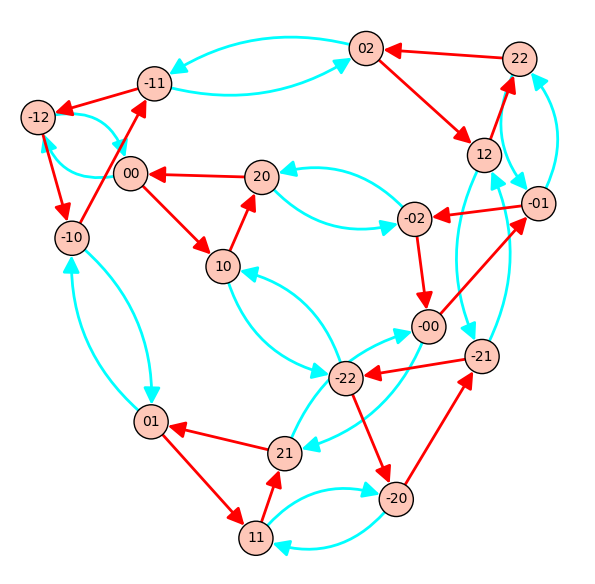

In [71]:
R = rainbow(2)
edge_colors={}
for i in range(2):
    edge_colors[R[i]] = []
for u,v,e in D.edges():
    for i in range(2):
        if e == Snormed[i]:
            edge_colors[R[i]].append((u,v,e))
D.plot(edge_colors=edge_colors,edge_labels=False)